# Importações

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import numpy as np

# Importação da base de dados

In [81]:
deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
un_population = pd.read_csv("/content/WPP2019_TotalPopulationBySex.csv")

In [5]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223


# Exploração dos dados


In [6]:
confirmed.set_index('Province/State')

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
Province/State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226
NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067


In [7]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223


In [8]:
confirmed_by_country.loc["China"][2:]

1/22/20      548.0
1/23/20      643.0
1/24/20      920.0
1/25/20     1406.0
1/26/20     2075.0
            ...   
11/2/20    91452.0
11/3/20    91478.0
11/4/20    91509.0
11/5/20    91552.0
11/6/20    91591.0
Name: China, Length: 290, dtype: float64

In [9]:
last_date = "11/6/20"

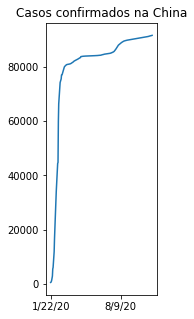

In [10]:
 # Extremamente apertado pequeno sendo longe do adequado ao passar uma mensagem errada

plt.figure(figsize=(2,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

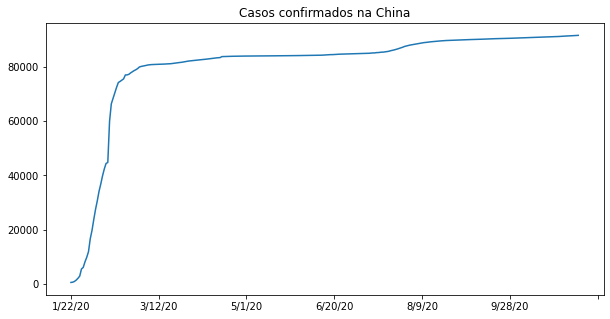

In [11]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

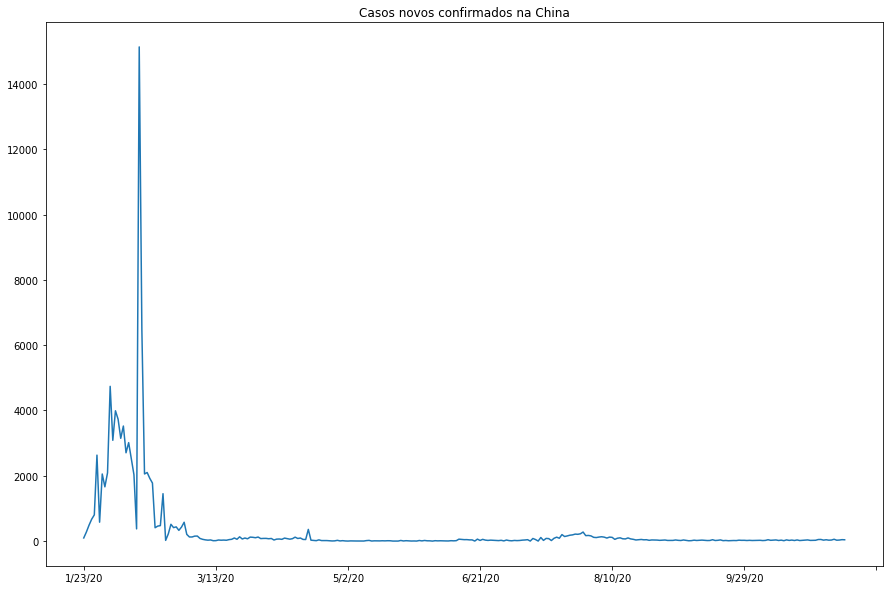

In [12]:
plt.figure(figsize=(15,10))
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
plt.title("Casos novos confirmados na China")
new_cases_china.plot()

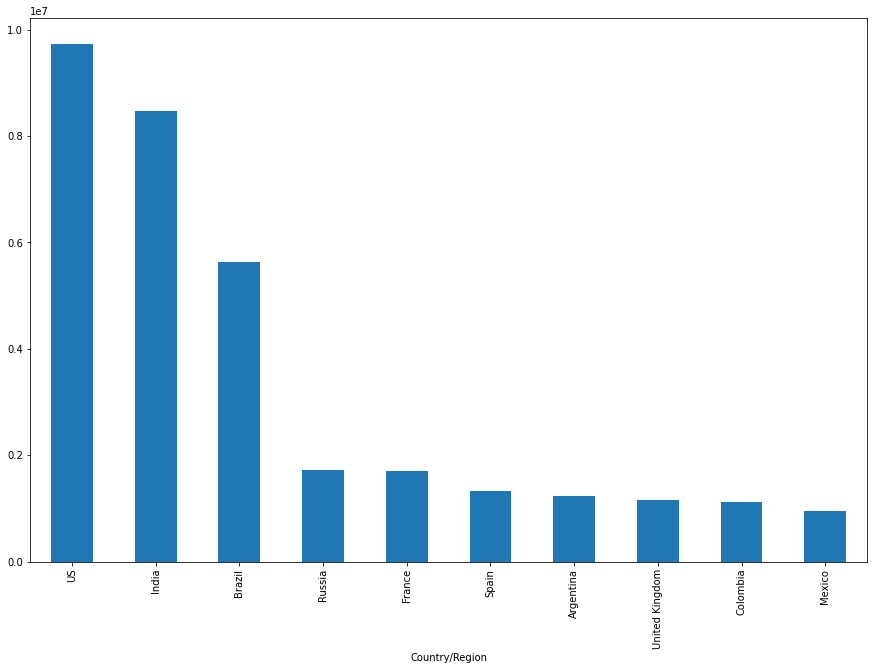

In [13]:
plt.figure(figsize=(15,10))
confirmed_by_country['11/6/20'].sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.show()

In [14]:
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511,1514,1518,1523,1529,1532,1533,1536,1536,1541,1544,1548,1554,1554
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439,443,448,451,454,458,462,465,469,473,477,480,487,493,499,502,509,518,527,532,536,543,549
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907,1914,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59,59,59,59,62,62,63,63,69,69,69,72,72,72,73,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228,234,241,247,248,251,255,260,265,267,268,270,271,275,275,279,284,286,289,291,296,299,300


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32642,32746,32789,32842,32842,32842,32852,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354,33447,33516,33561,33614,33760,33790,33824,33831,34010,34023,34129,34150,34217,34237,34239,34258,34321,34326,34342,34355,34362,34440,34440
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7629,7732,7847,8077,8342,8536,8675,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762,9864,9957,10001,10071,10167,10225,10341,10395,10466,10548,10654,10705,10808,10893,11007,11097,11189,11246,11367,11473,11578,11696,11861
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35962,36063,36174,36282,36385,36482,36578,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603,37603,37856,37971,38088,38215,38346,38482,38618,38788,38932,39095,39273,39444,39635,39635,40014,40201,40395,40577,40577,41001,41244,41510
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1265,1265,1432,1432,1540,1540,1540,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011,2011,2057,2057,2057,2273,2273,2470,2470,2729,2729,2729,2957,3029,3144,3260,3377,3475,3475,3548,3627,3734,3858,3858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1813,1833,1941,2082,2215,2436,2577,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801,2928,3012,3022,3030,3031,3037,3040,3305,3384,3461,3508,3530,3647,3693,3736,4107,4523,4920,5172,5230,5266,5350,5626


# Analise dos dados


In [15]:
def lastest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

lastest_by_country(confirmed)

Country/Region
Afghanistan           41975
Albania               23210
Algeria               60800
Andorra                5135
Angola                12223
                      ...  
West Bank and Gaza    57226
Western Sahara           10
Yemen                  2067
Zambia                16819
Zimbabwe               8471
Name: 11/6/20, Length: 190, dtype: int64

In [16]:
informations = [lastest_by_country(confirmed), lastest_by_country(deaths), lastest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,41975,1554,34440
Albania,23210,549,11861
Algeria,60800,2024,41510
Andorra,5135,75,3858
Angola,12223,300,5626


In [17]:
def lastest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]

informations = [lastest_by_country_at(confirmed, '2/20/20'), lastest_by_country_at(deaths, '2/20/20'), lastest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc['China']
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [18]:
informations = [lastest_by_country_at(confirmed, '2/8/20'), lastest_by_country_at(deaths, '2/20/20'), lastest_by_country_at(recovered, '2/20/20')]
combined_12_dias = pd.concat(informations, axis=1)
combined_12_dias.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12_dias.loc['China']
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]

print(letality_rate_1 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [19]:
# Taxa de letalidade é expressa em %
# O numero de casos letias dentro dos casos que foram letais e não leitas.

sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.5198636728588166
3.68546628056986


In [20]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,41975,1554,34440,3.702204,4.317386
Albania,23210,549,11861,2.365360,4.423852
Algeria,60800,2024,41510,3.328947,4.649240
Andorra,5135,75,3858,1.460565,1.906941
Angola,12223,300,5626,2.454389,5.062437
...,...,...,...,...,...
West Bank and Gaza,57226,511,49537,0.892951,1.021020
Western Sahara,10,1,8,10.000000,11.111111
Yemen,2067,602,1375,29.124335,30.450177


In [21]:
combined.sort_values("letality_rate_1", ascending = False)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
MS Zaandam,9,2,0,22.222222,100.000000
Western Sahara,10,1,8,10.000000,11.111111
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
...,...,...,...,...,...
Eritrea,484,0,429,0.000000,0.000000
Mongolia,357,0,314,0.000000,0.000000
Marshall Islands,1,0,0,0.000000,NaN


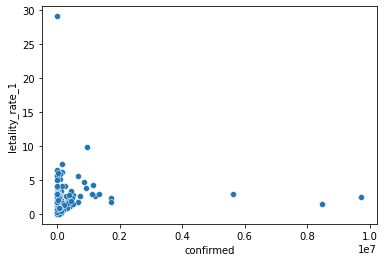

In [22]:
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="letality_rate_1")

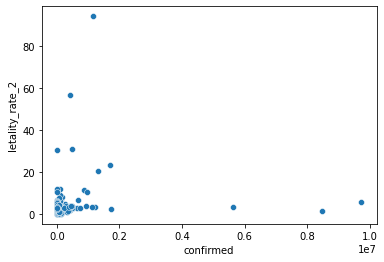

In [23]:
sns.scatterplot(data = combined.query("recovered > 40"), x="confirmed", y="letality_rate_2")

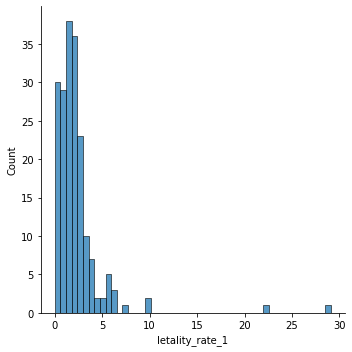

In [24]:
sns.displot(combined["letality_rate_1"])

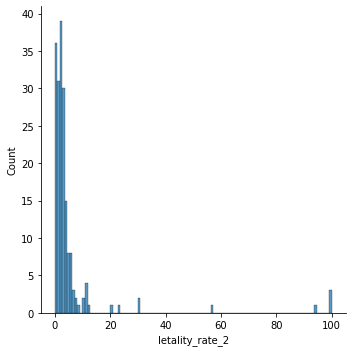

In [25]:
sns.displot(combined["letality_rate_2"])

In [26]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
Chad,1538,99,1362,6.436931,6.776181
Bolivia,142343,8781,113899,6.168902,7.157646
Sudan,13943,837,6764,6.003012,11.011709
Egypt,108754,6343,100106,5.832429,5.958722
Liberia,1442,82,1310,5.686546,5.890805
Iran,663800,37409,509952,5.635583,6.834429


In [27]:
combined.sort_values("letality_rate_1", ascending=False).query("recovered > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
Chad,1538,99,1362,6.436931,6.776181
Bolivia,142343,8781,113899,6.168902,7.157646
Sudan,13943,837,6764,6.003012,11.011709
Egypt,108754,6343,100106,5.832429,5.958722
Liberia,1442,82,1310,5.686546,5.890805
Iran,663800,37409,509952,5.635583,6.834429


In [29]:
confirmed.set_index("Country/Region").loc["China"].sum().tail()

11/2/20    91452
11/3/20    91478
11/4/20    91509
11/5/20    91552
11/6/20    91591
dtype: object

In [30]:
is_mainland = confirmed["Country/Region"] == "China"
is_mainland.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [31]:
confirmed["is_mainland_china"] = is_mainland
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,is_mainland_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,is_mainland_china
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226,False
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,False
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067,False
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14715,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549,15587,15616,15659,15659,15789,15853,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770,16819,False
267,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7837,7838,7850,7858,7885,7888,7898,7915,7919,7951,7994,8010,8011,8021,8036,8055,8075,8099,8110,8147,8159,8187,8215,8242,8257,8269,8276,8303,8315,8320,8349,8362,8367,8374,8389,8410,8427,8444,8471,False


In [33]:
# query só de mainland china
confirmed.query("is_mainland_china").head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,is_mainland_china
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,True
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,936,936,936,936,936,936,936,936,936,936,936,936,937,937,937,937,937,937,937,937,938,938,938,938,940,940,940,941,941,942,942,942,942,942,944,944,945,945,945,True
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,584,584,585,585,585,585,585,585,585,585,585,585,585,585,585,585,586,586,586,586,587,587,587,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,True
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,409,409,411,411,411,413,413,413,413,414,414,415,416,416,416,416,417,417,417,417,418,419,420,427,429,429,430,431,431,432,436,436,437,437,441,443,444,446,455,True
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,177,180,180,180,180,180,180,True


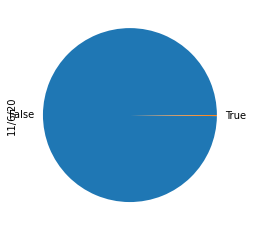

In [34]:
confirmed.groupby("is_mainland_china").sum()[last_date].plot(kind='pie')

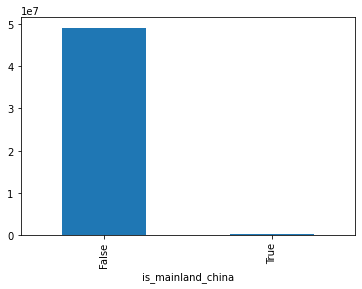

In [35]:
confirmed.groupby("is_mainland_china").sum()[last_date].plot(kind='bar')

In [36]:
confirmed['is_mainland_china_label'] = np.where(confirmed["is_mainland_china"], 'Mainland China', 'Others')
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,is_mainland_china,is_mainland_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,False,Others


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,is_mainland_china,is_mainland_china_label
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226,False,Others
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,False,Others
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067,False,Others
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549,15587,15616,15659,15659,15789,15853,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770,16819,False,Others
267,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7838,7850,7858,7885,7888,7898,7915,7919,7951,7994,8010,8011,8021,8036,8055,8075,8099,8110,8147,8159,8187,8215,8242,8257,8269,8276,8303,8315,8320,8349,8362,8367,8374,8389,8410,8427,8444,8471,False,Others


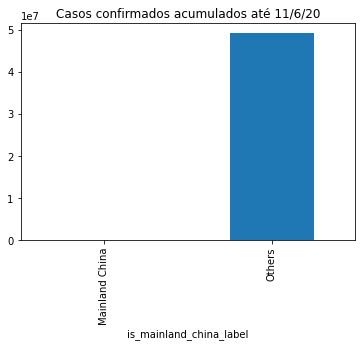

In [37]:
confirmed.groupby("is_mainland_china_label").sum()[last_date].plot(kind='bar')
plt.title(f"Casos confirmados acumulados até {last_date}")
plt.show()

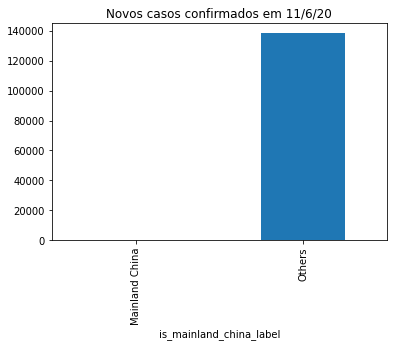

In [39]:
summed = confirmed.groupby("is_mainland_china_label").sum()
summed["delta"] = summed["6/11/20"] - summed["6/10/20"]
summed["delta"].plot(kind='bar')
plt.title(f"Novos casos confirmados em {last_date}")
plt.show()

In [40]:
summed.T.head()

is_mainland_china_label,Mainland China,Others
Lat,1085.2923,4518.575550
Long,3688.9377,2715.034214
1/22/20,548.0000,7.000000
1/23/20,643.0000,11.000000
1/24/20,920.0000,21.000000


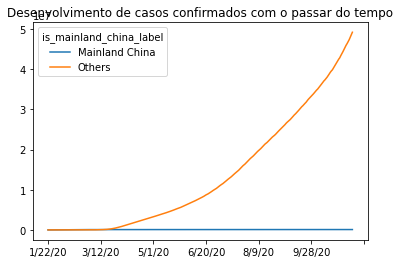

In [41]:
summed.T[2:-2].plot()
plt.title("Desenvolvimento de casos confirmados com o passar do tempo")
plt.show()

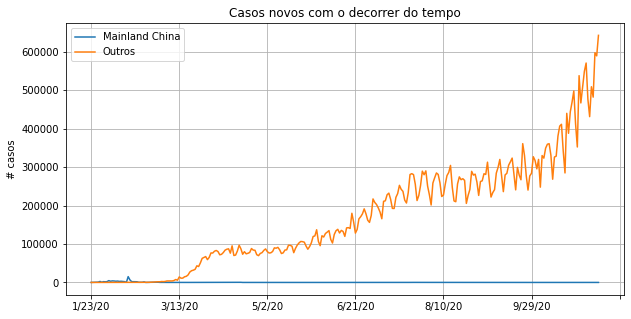

In [45]:
differences = summed.T[2:-2].diff().dropna()
ax = differences.plot(figsize=(10,5),
                      title="Casos novos com o decorrer do tempo",
                      grid=True)
plt.legend(["Mainland China", "Outros"])
ax.set_ylabel("# casos")
plt.show()

In [46]:
differences.head()

is_mainland_china_label,Mainland China,Others
1/23/20,95.0,4.0
1/24/20,277.0,10.0
1/25/20,486.0,7.0
1/26/20,669.0,15.0
1/27/20,802.0,7.0


In [47]:
cases = confirmed.groupby("is_mainland_china_label").sum()[last_date].loc["Mainland China"]
estimated_population =  1437525528
incidence_ratio = cases / estimated_population * 100000
incidence_ratio


6.371434678271675

In [48]:
un_population["PopTotal"] = un_population["PopTotal"] * 1000
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [50]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+05,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+06,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e-01,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+03,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+04,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+05,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+07,56025.839000


In [56]:
un_population_total = un_population.query("Time==2019")[["Location","PopTotal"]].set_index("Location")
un_population_total.head()

,PopTotal
Location,
Afghanistan,38041.757
Africa,1308064.176
African Group,1306320.572
African Union,1306903.030
African Union: Central Africa,154013.705


In [57]:
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,41975,1554,34440,3.702204,4.317386,38041.757
Albania,23210,549,11861,2.365360,4.423852,2880.913
Algeria,60800,2024,41510,3.328947,4.649240,43053.054
Andorra,5135,75,3858,1.460565,1.906941,77.146
Angola,12223,300,5626,2.454389,5.062437,31825.299
...,...,...,...,...,...,...
West Bank and Gaza,57226,511,49537,0.892951,1.021020,NaN
Western Sahara,10,1,8,10.000000,11.111111,582.458
Yemen,2067,602,1375,29.124335,30.450177,29161.922
Zambia,16819,349,15862,2.075034,2.152859,17861.034


In [58]:
combined.join(un_population_total).sort_values("confirmed", ascending=False).head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,9733816,236073,3810791,2.425287,5.833480,NaN
India,8462080,125562,7819886,1.483820,1.580301,1366417.756
Brazil,5631181,162015,5118156,2.877105,3.068367,211049.519
Russia,1720063,29654,1288096,1.724007,2.250351,NaN
France,1709716,39916,131810,2.334657,23.244005,65129.731
Spain,1328832,38833,150376,2.922341,20.523865,46736.782
Argentina,1228814,33136,1042237,2.696584,3.081349,44780.675
United Kingdom,1149791,48565,2951,4.223811,94.271683,67530.161
Colombia,1127733,32405,1020263,2.873464,3.078368,50339.443
Mexico,955128,94323,812556,9.875430,10.400836,127575.529


In [59]:
un_population_total.index[:5]

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa'],
      dtype='object', name='Location')

In [60]:
def locate(population, country):
  return population.query(f"Location.str.contains('{country}') and Time==2019", engine='python') # procurar dentro de location a country

locate(un_population, 'Hong K')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.67,7436.157,7082.054


In [61]:
# vou assumir algumas premissas
# estou assumindo que na UN China = John Hokpins Mainland China

def rename_location(location):
  if location=='China':
    return 'Mainland China'
  if location=='Republic of Korea':
    return 'South Korea'
  if location=='Iran (Islamic Republic of)':
    return 'Iran'
  if location=='China, Hong Kong SAR':
    return 'Hong Kong'
  if location=='United States of America':
    return 'US'
  return location

un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query("location_for_who=='South Korea'").head()

,PopTotal,location_for_who
Location,,
Republic of Korea,51225.321,South Korea


In [62]:
un_population_total = un_population_total.set_index("location_for_who")
un_population_total.head()

,PopTotal
location_for_who,
Afghanistan,38041.757
Africa,1308064.176
African Group,1306320.572
African Union,1306903.030
African Union: Central Africa,154013.705


In [63]:
combined_expanded = combined.join(un_population_total).sort_values("confirmed", ascending=False).dropna()
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,9733816,236073,3810791,2.425287,5.833480,329064.917
India,8462080,125562,7819886,1.483820,1.580301,1366417.756
Brazil,5631181,162015,5118156,2.877105,3.068367,211049.519
France,1709716,39916,131810,2.334657,23.244005,65129.731
Spain,1328832,38833,150376,2.922341,20.523865,46736.782
Argentina,1228814,33136,1042237,2.696584,3.081349,44780.675
United Kingdom,1149791,48565,2951,4.223811,94.271683,67530.161
Colombia,1127733,32405,1020263,2.873464,3.078368,50339.443
Mexico,955128,94323,812556,9.875430,10.400836,127575.529
Peru,914722,34730,838265,3.796782,3.978259,32510.462


In [78]:
combined_expanded['incidence_ratio'] = combined_expanded['confirmed'] / combined_expanded['PopTotal'] * 100000
combined_expanded['mortality_rate'] = combined_expanded['deaths'] / combined_expanded['PopTotal'] * 100000
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_rate
US,9733816,236073,3810791,2.425287,5.833480,329064.917,2.958023e+06,71740.555679
India,8462080,125562,7819886,1.483820,1.580301,1366417.756,6.192894e+05,9189.137030
Brazil,5631181,162015,5118156,2.877105,3.068367,211049.519,2.668180e+06,76766.344111
France,1709716,39916,131810,2.334657,23.244005,65129.731,2.625093e+06,61286.910582
Spain,1328832,38833,150376,2.922341,20.523865,46736.782,2.843225e+06,83088.732981
Argentina,1228814,33136,1042237,2.696584,3.081349,44780.675,2.744072e+06,73996.204836
United Kingdom,1149791,48565,2951,4.223811,94.271683,67530.161,1.702633e+06,71916.013942
Colombia,1127733,32405,1020263,2.873464,3.078368,50339.443,2.240257e+06,64372.980845
Mexico,955128,94323,812556,9.875430,10.400836,127575.529,7.486765e+05,73935.025580
Peru,914722,34730,838265,3.796782,3.978259,32510.462,2.813624e+06,106827.149980


In [65]:
confirmed.sort_values(last_date, ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
244,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,7150727,7192846,7234263,7279034,7333572,7383636,7419103,7458658,7500611,7550952,7607182,7664626,7719268,7763888,7805561,7858011,7917547,7981202,8050367,8107914,8156137,8214532,8274887,8337663,8409364,8493111,8576841,8637648,8704446,8778078,8856436,8944957,9044278,9133404,9206998,9291087,9382617,9485448,9607336,9733816
143,NaN,India,20.593684,78.962880,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,6145291,6225763,6312584,6394068,6473544,6549373,6623815,6685082,6757131,6835655,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680,7494551,7550273,7597063,7651107,7706946,7761312,7814682,7864811,7909959,7946429,7990322,8040203,8088851,8137119,8184082,8229313,8267623,8313876,8364086,8411724,8462080
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,4745464,4777522,4810935,4847092,4847092,4906833,4915289,4927235,4969141,5000694,5028444,5055888,5082637,5094979,5103408,5113628,5140863,5169386,5200300,5224362,5224362,5250727,5273954,5298772,5323630,5353656,5380635,5394128,5409854,5439641,5468270,5494376,5516658,5535605,5545705,5554206,5566049,5590025,5590025,5631181
209,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1154299,1162428,1170799,1179634,1188928,1198663,1209039,1219796,1231277,1242258,1253603,1265572,1278245,1291687,1305093,1318783,1332824,1346380,1361317,1376020,1390824,1406667,1422775,1438219,1453923,1471000,1487260,1503652,1520800,1537142,1553028,1570446,1588433,1606267,1624648,1642665,1661096,1680579,1699695,1720063
126,NaN,France,46.227600,2.213700,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,...,552832,564690,576907,589825,601971,601971,601971,636196,646531,664178,682192,702148,702148,702148,745104,766421,788117,818707,843475,843471,843471,918679,939147,965451,1007026,1048842,1048842,1048842,1172754,1206014,1240862,1288478,1337693,1373036,1419326,1471091,1507078,1547831,1605171,1665403


In [66]:
# https://en.wikipedia.org/wiki/Hubei
# hubei population

hubei_population = 59020000
confirmed_cases = confirmed.set_index("Province/State").loc["Hubei"][last_date]
death_cases = deaths.set_index("Province/State").loc["Hubei"][last_date]
recovered_cases = recovered.set_index("Province/State").loc["Hubei"][last_date]

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + recovered_cases) * 100
print(f"Letality rate 1: {letality_rate_1}%")
print(f"Letality rate 2: {letality_rate_2}%")

Letality rate 1: 6.621369766520406%
Letality rate 2: 6.62175846431559%


fonte: https://www.cdc.gov/flu/about/burden/index.html

In [67]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_hospitalization = 34157 / 490561 * 100

print(f"Letality rate hospitalização EUA influenza 2018-2019: {letality_rate_hospitalization}%")

Letality rate hospitalização EUA influenza 2018-2019: 6.962844579980879%


In [68]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_medical_visit = 34157 / 16520350 * 100

print(f"Letality rate visita médica EUA influenza 2018-2019: {letality_rate_medical_visit}%")

Letality rate visita médica EUA influenza 2018-2019: 0.20675712076317995%


In [69]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_symptomatic = 34157 / 35520883 * 100

print(f"Letality rate sintomáticos EUA influenza 2018-2019: {letality_rate_symptomatic}%")

Letality rate sintomáticos EUA influenza 2018-2019: 0.09616033475293956%


In [70]:
incidence_ratio = confirmed_cases / hubei_population * 100000 # a cada 100.000 habitantes.
mortality_rate = death_cases / hubei_population * 100000

print(f"Coeficiente de incidencia em Hubei {incidence_ratio}")
print(f"Coeficiente de mortalidade em Hubei {mortality_rate}")

Coeficiente de incidencia em Hubei 115.45747204337513
Coeficiente de mortalidade em Hubei 7.64486614706879


In [71]:
# estados unidos, mesmo relatorio de burden, coeficiente de incidencia

incidence_ratio = 35520883 / 329450000 * 100000
mortality_rate = 34157 / 329450000 * 100000

print(f"Coeficiente de incidencia de influenza 2018-2019 em EUA  {incidence_ratio}")
print(f"Coeficiente de mortalidade de influenza 2018-2019 em EUA {mortality_rate}")

Coeficiente de incidencia de influenza 2018-2019 em EUA  10781.873728942177
Coeficiente de mortalidade de influenza 2018-2019 em EUA 10.367885870390044


In [79]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1],recovered.sum()[2:], deaths.sum()[2:]],
            index=["confirmed", "recovered", "deaths"]).T
grouped_per_day.head()

,confirmed,recovered,deaths
1/22/20,555.0,28.0,17.0
1/23/20,654.0,30.0,18.0
1/24/20,941.0,36.0,26.0
1/25/20,1434.0,39.0,42.0
1/26/20,2118.0,52.0,56.0


In [80]:
grouped_per_day["letality_rate_1"] = grouped_per_day["deaths"]/ grouped_per_day["confirmed"] * 100
grouped_per_day["letality_rate_2"] = grouped_per_day["deaths"] / (grouped_per_day["deaths"] + grouped_per_day["recovered"]) * 100
grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
1/22/20,555.0,28.0,17.0,3.063063,37.777778
1/23/20,654.0,30.0,18.0,2.752294,37.500000
1/24/20,941.0,36.0,26.0,2.763018,41.935484
1/25/20,1434.0,39.0,42.0,2.928870,51.851852
1/26/20,2118.0,52.0,56.0,2.644004,51.851852


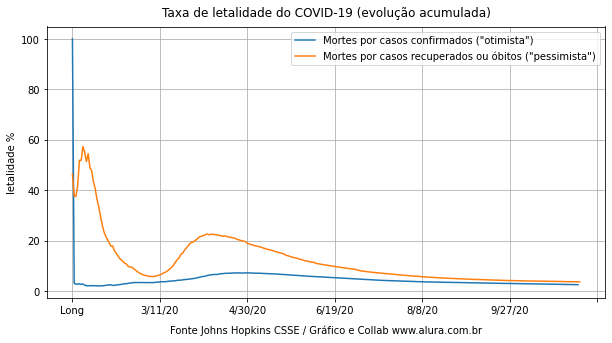

In [74]:
fig = plt.figure(figsize=(10,5))
grouped_per_day["letality_rate_1"].plot()
ax = grouped_per_day["letality_rate_2"].plot()
plt.legend(['Mortes por casos confirmados ("otimista")', 'Mortes por casos recuperados ou óbitos ("pessimista")'])
plt.title("Taxa de letalidade do COVID-19 (evolução acumulada)", pad=10)
plt.grid(linestyle='-')
ax.set_ylabel("letalidade %")
ax.set_xlabel("Fonte Johns Hopkins CSSE / Gráfico e Collab www.alura.com.br", labelpad=10)
plt.show()

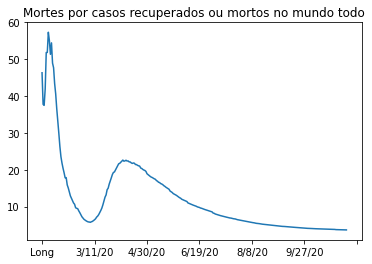

In [75]:
grouped_per_day["letality_rate_2"].plot()
plt.title("Mortes por casos recuperados ou mortos no mundo todo")
plt.show()

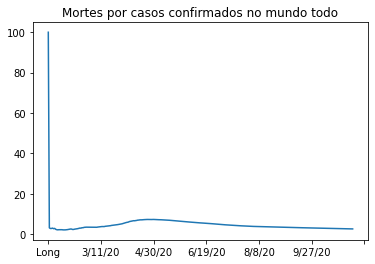

In [76]:
grouped_per_day["letality_rate_1"].plot()
plt.title("Mortes por casos confirmados no mundo todo")
plt.show()